# Analysis of Causes of Death in the US from 1900-2018
The data comes from the National Center for Health Statistics and the site for this particular data is
[https://data.cdc.gov/NCHS/NCHS-Age-adjusted-Death-Rates-for-Selected-Major-C/6rkc-nb2q]
We've downloaded the data and stored it in ./data/deathrates.csv

The goal of this notebook is to give an example of how to use pandas and numpy to answer questions about a fairly large and interesting dataset.

The main question we want to answer is:
* How have the five main causes of death in the US changed in the past 118 years?

We will answer this by loading the data into a pandas data frame and then using pandas to create a plot
with each cause of death being a line plot and the x axis is the age adjusted death rate for that cause.

The more general skill we are hoping you will learn is how to use the pandas and numpy documentation to learn how to do more analysis that we can teach in this course.  Here is the pandas user manual
* https://pandas.pydata.org/docs/user_guide/index.html

and here is the numpy user guide
* https://numpy.org/doc/stable/user/index.html


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the data into a data frame
We use the pd.read_csv function to read in the data.
It has three columns (Series)
* Year - an integer
* Cauase - a string
* Age Adjusted Death Rate - a float

There are 595 rows

In [3]:
df = pd.read_csv('data/deathrates.csv')
df

,Year,Cause,Age Adjusted Death Rate
0,1900,Heart Disease,265.4
1,1901,Heart Disease,272.6
2,1902,Heart Disease,285.2
3,1903,Heart Disease,304.5
4,1904,Heart Disease,331.5
...,...,...,...
590,2014,Influenza and Pneumonia,15.1
591,2015,Influenza and Pneumonia,15.2
592,2016,Influenza and Pneumonia,13.5
593,2017,Influenza and Pneumonia,14.3


# Getting the causes
we can pull out one column from the table using the [] notation.

In [12]:
df['Cause']

0                Heart Disease
1                Heart Disease
2                Heart Disease
3                Heart Disease
4                Heart Disease
                ...           
590    Influenza and Pneumonia
591    Influenza and Pneumonia
592    Influenza and Pneumonia
593    Influenza and Pneumonia
594    Influenza and Pneumonia
Name: Cause, Length: 595, dtype: object

and we can use the .unique() method to get the array of 5 unique values for cause and 2018 unique values for year

In [14]:
causes = df['Cause'].unique()
causes

array(['Heart Disease', 'Cancer', 'Accidents', 'Stroke',
       'Influenza and Pneumonia'], dtype=object)

In [15]:
df['Year'].unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

# Selecting a subset of rows
We can select just those rows for Heart Disease using the boolean selector notation
```
df[df[COLUMN]==VALUE]
```



In [35]:
d1 = df[df['Cause']=='Heart Disease']
d1

,Year,Cause,Age Adjusted Death Rate
0,1900,Heart Disease,265.4
1,1901,Heart Disease,272.6
2,1902,Heart Disease,285.2
3,1903,Heart Disease,304.5
4,1904,Heart Disease,331.5
...,...,...,...
114,2014,Heart Disease,167.0
115,2015,Heart Disease,168.5
116,2016,Heart Disease,165.5
117,2017,Heart Disease,165.0


# making the plot
We now know how to pull out just the rows we want for each cause
and to pull out the series for the year and for the death rate for those rows
which is all we need to know to be able to plot the data.

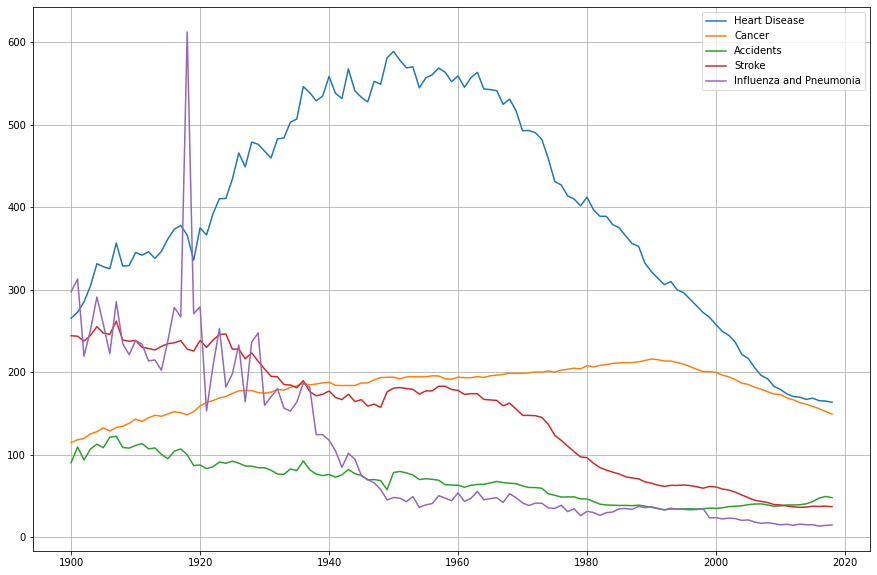

In [36]:
plt.figure(figsize=(15,10))
for cause in causes:
    d1 = df[df['Cause']==cause]  # remove all rows except those with the specified cause
    # plot the year vs the death rate, labeled with the cause
    plt.plot(d1['Year'],d1['Age Adjusted Death Rate'],label=cause)
plt.legend()
plt.grid()

# Discussion of results
We see that there was a big spike for Influenza and Pneumonia around 1918. This was the Spanish Flu pandemic (which probably started in the US).
We also see that Heart Disase peaked around 1950 but stroke and accidents steadily fell.
Cancer steadily rose until about 1990 when it started to fall.
The more interesting questions, which this data will not tell us, is why do we observe these patterns!


# A simpler approach to this analysis
Here we show how to use pivot tables to plot the data in a more elegant way.
Notice that our data tables has a Cause column with 5 possible values. 


In [40]:
df


,Year,Cause,Age Adjusted Death Rate
0,1900,Heart Disease,265.4
1,1901,Heart Disease,272.6
2,1902,Heart Disease,285.2
3,1903,Heart Disease,304.5
4,1904,Heart Disease,331.5
...,...,...,...
590,2014,Influenza and Pneumonia,15.1
591,2015,Influenza and Pneumonia,15.2
592,2016,Influenza and Pneumonia,13.5
593,2017,Influenza and Pneumonia,14.3


# Creating a pivot table
We can create a "pivot table" in which those causes are the column headers and the values
stored in the columns are the death rates.

In [41]:
df2 = pd.pivot_table(df, values="Age Adjusted Death Rate", index=["Year"], columns=["Cause"])
df2

Cause,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
Year,,,,,
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2
...,...,...,...,...,...
2014,40.5,161.2,167.0,15.1,36.5
2015,43.2,158.5,168.5,15.2,37.6
2016,47.4,155.8,165.5,13.5,37.3


# Plotting a pivot table
Now that we have a table where the index is the year, and the columns contain the data we want to plot,
we can use the built-in plot method (which calls matplotlib.pyplot.plot behind the scenes)

Text(0, 0.5, 'age adjusted death rate per 100,000')

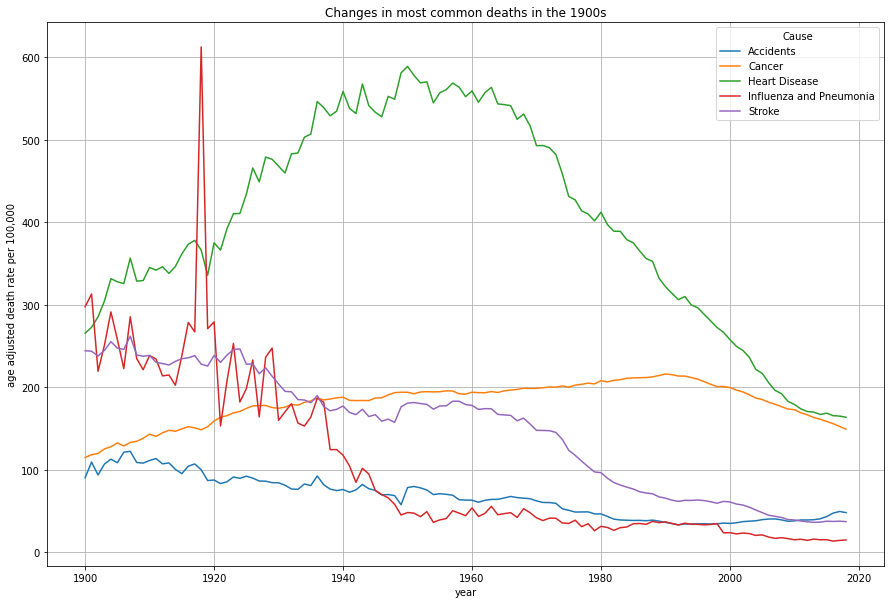

In [51]:
df2.plot(figsize=(15,10))
plt.grid()
plt.title('Changes in most common deaths in the 1900s')
plt.xlabel('year')
plt.ylabel('age adjusted death rate per 100,000')

# More info on pandas plotting
We can get more info on pandas plotting using this command
```
help(df2.plot)
```
or looking  at the [pandas API reference for plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
